# Demo 02: Introduction to Pandas, Reading Data, and Plotting!

In this demo we will get more practice working with Pandas, slicing data, and some simple plotting. At the very end we will do a bit more complex analysis and make a model!

In [1]:
# clone the course repository, change to right directory, and import libraries.
%cd /content
!git clone https://github.com/nmattei/cmps3160.git
%cd /content/cmps3160/_demos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/content
Cloning into 'cmps3160'...
remote: Enumerating objects: 1629, done.
remote: Counting objects: 100% (519/519), done.
remote: Compressing objects: 100% (218/218), done.
remote: Total 1629 (delta 310), reused 428 (delta 254), pack-reused 1110
Receiving objects: 100% (1629/1629), 41.22 MiB | 29.87 MiB/s, done.
Resolving deltas: 100% (911/911), done.
/content/cmps3160/_demos


# Intro to Pandas, Reading Data, and Plotting

The cell below loads up a few libraries and does some initialization.  In this notebook we'll do a few basic data manipulations and see the Pandas formatting for the first time and make some simple graphs.


In [2]:
### Customizing plot styles
plt.style.use('fivethirtyeight')
# Make the fonts a little bigger in our graphs.
font = {'size'   : 20}
plt.rc('font', **font)
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['pdf.fonttype'] = 42

## Working with some real data and Pandas!

Opening and reading CSV files is very easy with Pandas [Read CSV Documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)

In general the [Pandas Documentation](https://pandas.pydata.org/docs/) is very good and you should spend some time getting to know it. You can also use the cheatsheets that we have posted on the [course webpage](https://nmattei.github.io/cmps3160/).

In [3]:
# Open the NBA Salaries file.
df_nba = pd.read_csv("data/nba_salaries.csv")

Once we have loaded the data into the variable `df_nba` we can print it out! We can also slice the data by the index, or first column of the dataframe.

In [4]:
# Display gives us a basic table.  Note that we can index and slice this in many different ways.
display(df_nba)

,PLAYER,POSITION,TEAM,'15-'16 SALARY
0,Paul Millsap,PF,Atlanta Hawks,18.671659
1,Al Horford,C,Atlanta Hawks,12.000000
2,Tiago Splitter,C,Atlanta Hawks,9.756250
3,Jeff Teague,PG,Atlanta Hawks,8.000000
4,Kyle Korver,SG,Atlanta Hawks,5.746479
...,...,...,...,...
412,Gary Neal,PG,Washington Wizards,2.139000
413,DeJuan Blair,C,Washington Wizards,2.000000
414,Kelly Oubre Jr.,SF,Washington Wizards,1.920240
415,Garrett Temple,SG,Washington Wizards,1.100602


In [5]:
# Within this we can get different rows of the table by the index, the left most column
display(df_nba[10:30])

,PLAYER,POSITION,TEAM,'15-'16 SALARY
10,Walter Tavares,C,Atlanta Hawks,1.000000
11,Jason Richardson,SG,Atlanta Hawks,0.947276
12,Lamar Patterson,SG,Atlanta Hawks,0.525093
13,Terran Petteway,SG,Atlanta Hawks,0.525093
14,Avery Bradley,PG,Boston Celtics,7.730337
15,Isaiah Thomas,PG,Boston Celtics,6.912869
16,Jae Crowder,SF,Boston Celtics,6.796117
17,Jonas Jerebko,PF,Boston Celtics,5.000000
18,Marcus Smart,PG,Boston Celtics,3.431040
19,Evan Turner,SG,Boston Celtics,3.425510


We can pull out specific cells in the table.

In [6]:
# Look at a specific person... a little clunky.
display(df_nba.loc[df_nba['PLAYER'] == "Stephen Curry"])

,PLAYER,POSITION,TEAM,'15-'16 SALARY
121,Stephen Curry,PG,Golden State Warriors,11.370786


In [7]:
# Can filter for a whole set
df_nba.loc[df_nba['POSITION'] == "PG"][:10]
# Again note that we can slice this different ways
# but we will always get the results in the order of the *index*

,PLAYER,POSITION,TEAM,'15-'16 SALARY
3,Jeff Teague,PG,Atlanta Hawks,8.000000
8,Dennis Schroder,PG,Atlanta Hawks,1.763400
14,Avery Bradley,PG,Boston Celtics,7.730337
15,Isaiah Thomas,PG,Boston Celtics,6.912869
18,Marcus Smart,PG,Boston Celtics,3.431040
24,Terry Rozier,PG,Boston Celtics,1.824360
31,Jarrett Jack,PG,Brooklyn Nets,6.300000
35,Shane Larkin,PG,Brooklyn Nets,1.500000
44,Kemba Walker,PG,Charlotte Hornets,12.000000
51,Brian Roberts,PG,Charlotte Hornets,2.854940


Because our data is well organized (we'll get more into how to do this well when we get into Tidy Data) we can use the selecting features to see a team.

In [8]:
# Can also see a team...
df_nba.loc[df_nba['TEAM'] == "New Orleans Pelicans"]

,PLAYER,POSITION,TEAM,'15-'16 SALARY
239,Eric Gordon,SG,New Orleans Pelicans,15.514031
240,Tyreke Evans,SG,New Orleans Pelicans,10.734586
241,Jrue Holiday,PG,New Orleans Pelicans,10.595507
242,Omer Asik,C,New Orleans Pelicans,9.213483
243,Ryan Anderson,PF,New Orleans Pelicans,8.500000
244,Anthony Davis,PF,New Orleans Pelicans,7.070730
245,Alexis Ajinca,C,New Orleans Pelicans,4.389607
246,Quincy Pondexter,SF,New Orleans Pelicans,3.382023
247,Norris Cole,PG,New Orleans Pelicans,3.036927
248,Dante Cunningham,PF,New Orleans Pelicans,2.850000


You may have noticed that we are using boolean functions to select, we can combine these using the standard boolean operators `|`, `&`, and `!`. One quirk of Pandas is that we really should encase all our boolean logic in parentisis, which can get a bit cumbersome.

In [9]:
df_nba.loc[(df_nba['TEAM'] == "New Orleans Pelicans") | (df_nba['TEAM'] == "Boston Celtics")]

,PLAYER,POSITION,TEAM,'15-'16 SALARY
14,Avery Bradley,PG,Boston Celtics,7.730337
15,Isaiah Thomas,PG,Boston Celtics,6.912869
16,Jae Crowder,SF,Boston Celtics,6.796117
17,Jonas Jerebko,PF,Boston Celtics,5.000000
18,Marcus Smart,PG,Boston Celtics,3.431040
19,Evan Turner,SG,Boston Celtics,3.425510
20,Tyler Zeller,C,Boston Celtics,2.616975
21,Jared Sullinger,C,Boston Celtics,2.569260
22,Kelly Olynyk,C,Boston Celtics,2.165160
23,Perry Jones,SF,Boston Celtics,2.038206


In [10]:
# We can also do more complex selection, which we'll need a lot!
df_nba.loc[(df_nba["'15-'16 SALARY"] > 5.0)]

,PLAYER,POSITION,TEAM,'15-'16 SALARY
0,Paul Millsap,PF,Atlanta Hawks,18.671659
1,Al Horford,C,Atlanta Hawks,12.000000
2,Tiago Splitter,C,Atlanta Hawks,9.756250
3,Jeff Teague,PG,Atlanta Hawks,8.000000
4,Kyle Korver,SG,Atlanta Hawks,5.746479
...,...,...,...,...
401,Nene Hilario,C,Washington Wizards,13.000000
402,Marcin Gortat,C,Washington Wizards,11.217391
403,Markieff Morris,PF,Washington Wizards,8.000000
404,Bradley Beal,SG,Washington Wizards,5.694674


**Gotcha Warning** Pandas will let you use a `.attribute` notation... but I don't like this...

In [11]:
# There are other ways to index, but I always use the full selection as it's more explicit.
df_nba.loc[df_nba.TEAM == "New Orleans Pelicans"]

,PLAYER,POSITION,TEAM,'15-'16 SALARY
239,Eric Gordon,SG,New Orleans Pelicans,15.514031
240,Tyreke Evans,SG,New Orleans Pelicans,10.734586
241,Jrue Holiday,PG,New Orleans Pelicans,10.595507
242,Omer Asik,C,New Orleans Pelicans,9.213483
243,Ryan Anderson,PF,New Orleans Pelicans,8.500000
244,Anthony Davis,PF,New Orleans Pelicans,7.070730
245,Alexis Ajinca,C,New Orleans Pelicans,4.389607
246,Quincy Pondexter,SF,New Orleans Pelicans,3.382023
247,Norris Cole,PG,New Orleans Pelicans,3.036927
248,Dante Cunningham,PF,New Orleans Pelicans,2.850000


**Question:** Why would I not want to use the `.TEAM` syntax all the time? What could go wrong?

In [12]:
# Can also just pick out a subset of coumns if we want.
df_nba[['PLAYER', 'TEAM']]

,PLAYER,TEAM
0,Paul Millsap,Atlanta Hawks
1,Al Horford,Atlanta Hawks
2,Tiago Splitter,Atlanta Hawks
3,Jeff Teague,Atlanta Hawks
4,Kyle Korver,Atlanta Hawks
...,...,...
412,Gary Neal,Washington Wizards
413,DeJuan Blair,Washington Wizards
414,Kelly Oubre Jr.,Washington Wizards
415,Garrett Temple,Washington Wizards


In the above the function returns a **view** of a dataframe with just the relevant columns. We can use this and compute summary stats, which we'll use more later.

I really cannot stress enough how useful [the handy Pandas Cheat Sheet is.](https://drive.google.com/file/d/1SWw2QXKPGJv99_a4VceEdBkmnB2Zljb5/view)

In [13]:
# Can also compute summary stats over columns, like the mean.. (look at cheat sheet!)
# Note the problem with the column name!
df_nba.loc[df_nba['TEAM'] == "New Orleans Pelicans"]["'15-'16 SALARY"].sum()

80.51460599999999

In [14]:
df_nba["'15-'16 SALARY"].median()

3.0

In [15]:
df_nba["'15-'16 SALARY"].describe()

count    417.000000
mean       5.074814
std        5.221437
min        0.030888
25%        1.270964
50%        3.000000
75%        7.000000
max       25.000000
Name: '15-'16 SALARY, dtype: float64

# Sorting!

Up to now everything has been sorted by the `index` or first columnt of the dataframe. We might want to sort by other things, so we can use `sort_values`.

In [16]:
# Look at all PGs sorted by salary...
df_nba.loc[df_nba['POSITION'] == "PG"].sort_values("'15-'16 SALARY", ascending=False)[:10]

,PLAYER,POSITION,TEAM,'15-'16 SALARY
156,Chris Paul,PG,Los Angeles Clippers,21.468695
60,Derrick Rose,PG,Chicago Bulls,20.093064
269,Russell Westbrook,PG,Oklahoma City Thunder,16.744218
74,Kyrie Irving,PG,Cleveland Cavaliers,16.407501
400,John Wall,PG,Washington Wizards,15.851950
203,Goran Dragic,PG,Miami Heat,14.783000
107,Reggie Jackson,PG,Detroit Pistons,13.913044
311,Eric Bledsoe,PG,Phoenix Suns,13.500000
355,Tony Parker,PG,San Antonio Spurs,13.437500
226,Ricky Rubio,PG,Minnesota Timberwolves,12.700000


Note that the above sorting does not happen *in place* unless we explicitly tell Pandas to do so -- [Documentation for sort_values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html)

In [17]:
# Once we sort by values it does not stay the same unless we overwrite the table or do it in place...
df_nba.loc[df_nba['POSITION'] == "PG"][:5]

,PLAYER,POSITION,TEAM,'15-'16 SALARY
3,Jeff Teague,PG,Atlanta Hawks,8.000000
8,Dennis Schroder,PG,Atlanta Hawks,1.763400
14,Avery Bradley,PG,Boston Celtics,7.730337
15,Isaiah Thomas,PG,Boston Celtics,6.912869
18,Marcus Smart,PG,Boston Celtics,3.431040


### So let's try to sort it in place!

**Gotcha Warning!**

In [18]:
df_nba.loc[df_nba['POSITION'] == "PG"].sort_values("'15-'16 SALARY", inplace=True, ascending=False)

## This won't work -- note that we are getting a VIEW of the data with the first command, so
## we get the dreaded set with copy warning! because we are only operating on a view of the data!

<ipython-input-18-4a25196141af>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nba.loc[df_nba['POSITION'] == "PG"].sort_values("'15-'16 SALARY", inplace=True, ascending=False)


You are going to get so sick of the **SettingWithCopyWarning** before this class is over. Do not ignore these! They will cost you professionalism points on turned in assignments and, more importantly, it means you are likely doing something that you do not want to or do not mean to do.

[Remember Arie's Handy Coding Guide!](https://nmattei.github.io/cmps3140/codingguide)

In [19]:
# We have to sort, then print the whole data frame
df_nba.sort_values("'15-'16 SALARY", inplace=True, ascending=False)

In [20]:
df_nba.loc[df_nba['POSITION'] == "PG"][:5]

,PLAYER,POSITION,TEAM,'15-'16 SALARY
156,Chris Paul,PG,Los Angeles Clippers,21.468695
60,Derrick Rose,PG,Chicago Bulls,20.093064
269,Russell Westbrook,PG,Oklahoma City Thunder,16.744218
74,Kyrie Irving,PG,Cleveland Cavaliers,16.407501
400,John Wall,PG,Washington Wizards,15.851950


In [21]:
# But now everything is sorted!
df_nba[:5]

,PLAYER,POSITION,TEAM,'15-'16 SALARY
169,Kobe Bryant,SF,Los Angeles Lakers,25.000000
29,Joe Johnson,SF,Brooklyn Nets,24.894863
72,LeBron James,SF,Cleveland Cavaliers,22.970500
255,Carmelo Anthony,SF,New York Knicks,22.875000
131,Dwight Howard,C,Houston Rockets,22.359364


In [22]:
# Now let's put it back to normal... Note here we used .sort_index, if we used reset_index we'd renumber!!
df_nba.sort_index(inplace=True)
df_nba.loc[df_nba['POSITION'] == "PG"][:5]

,PLAYER,POSITION,TEAM,'15-'16 SALARY
3,Jeff Teague,PG,Atlanta Hawks,8.000000
8,Dennis Schroder,PG,Atlanta Hawks,1.763400
14,Avery Bradley,PG,Boston Celtics,7.730337
15,Isaiah Thomas,PG,Boston Celtics,6.912869
18,Marcus Smart,PG,Boston Celtics,3.431040


To make sure it is clear -- if we had called `reset_index` on the above then we would have completely renumbered and set the index to the current order. While this may not seem like a big deal now, it might be if our data was, e.g., dates!

<Axes: >

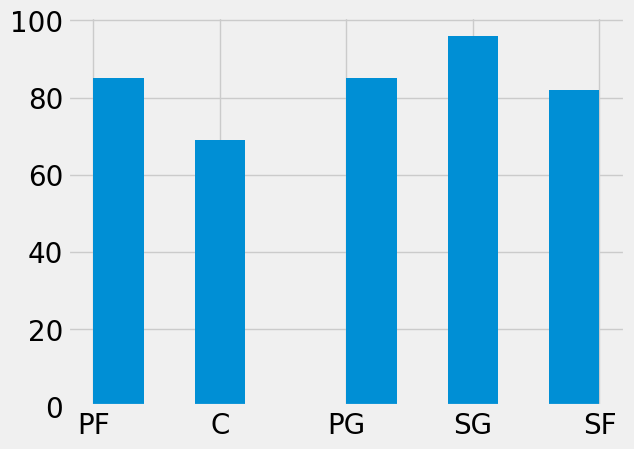

In [23]:
# Get a histogram with Pandas
df_nba['POSITION'].hist()

<Axes: xlabel='POSITION', ylabel='count'>

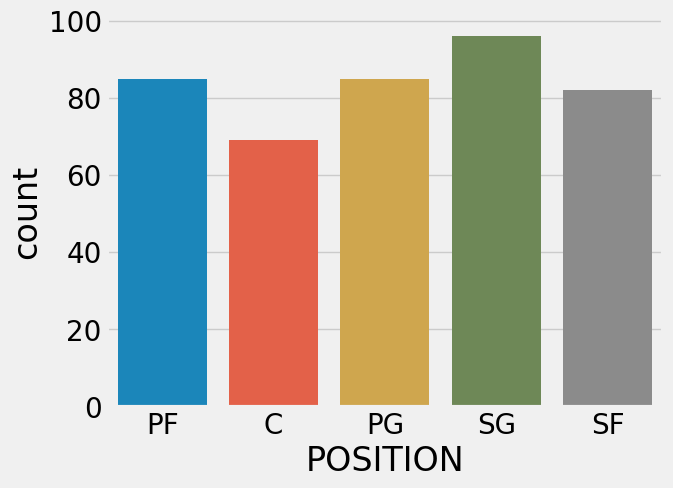

In [24]:
# Maybe see what the position distribution is... (using seaborn)
sns.countplot(x=df_nba['POSITION'])

<Axes: xlabel='POSITION', ylabel="'15-'16 SALARY">

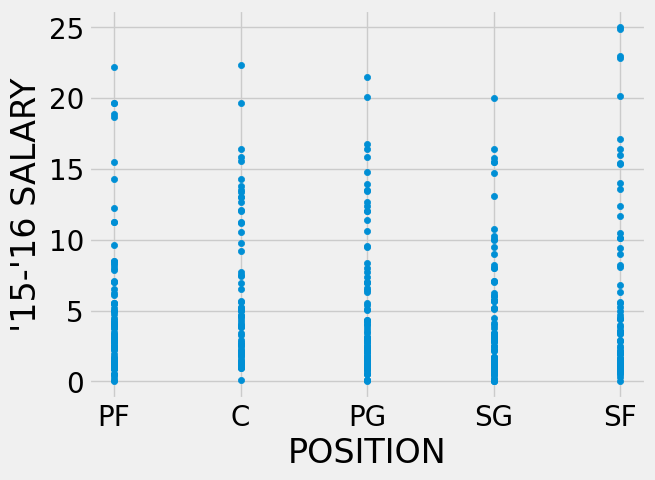

In [25]:
# Or we can see how salaries are distributed...
df_nba.plot.scatter(x='POSITION', y="'15-'16 SALARY")

<Axes: title={'center': "'15-'16 SALARY"}, xlabel='[POSITION]'>

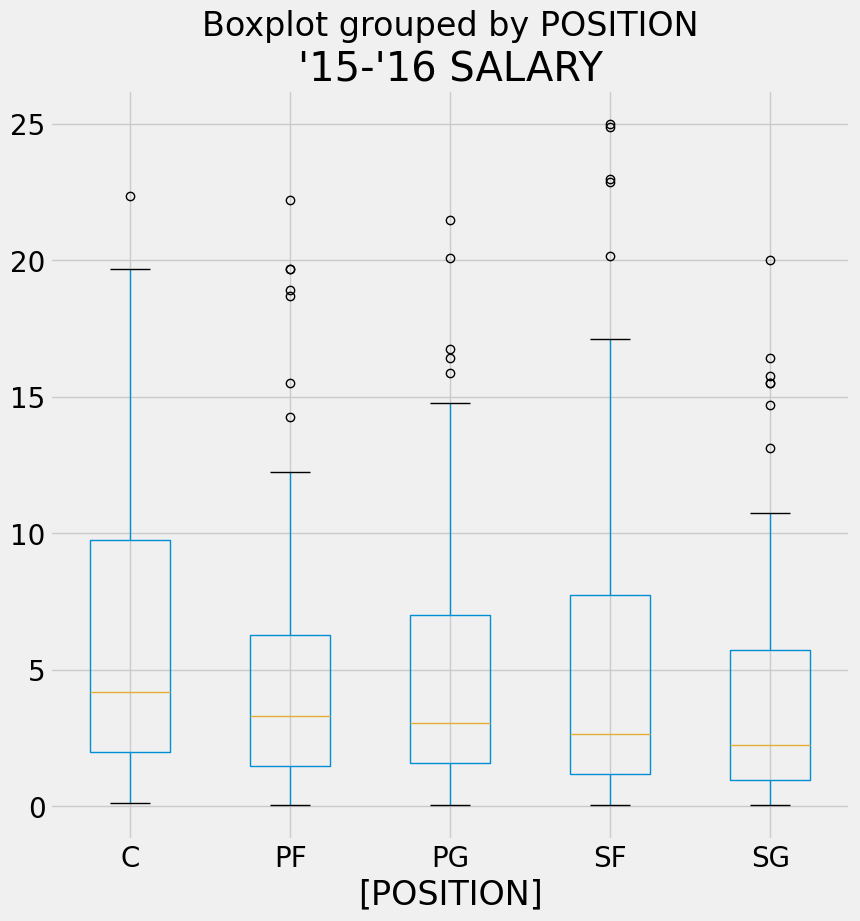

In [26]:
# Or box plots to get really fancy...
df_nba.boxplot(column=["'15-'16 SALARY"], by=['POSITION'], figsize=(10,10))

# Reading some Books and Making a Model!

So far we've seen the basics of how to sort and slice data, you'll practice these more in Lab 2!

But now let's try something more fun. We're going to go build a model that shows the relationship between the number of characters in a book, and the puncuation!

To do this we'll use several tools that we'll do much more with later in the semester including the `requests` library and using Python's regular expression processing features.

In [27]:
from urllib.request import urlopen
import re
def read_url(url):
    return re.sub('\\s+', ' ', urlopen(url).read().decode())

In [28]:

# Read two books, fast!

huck_finn_url = 'https://www.inferentialthinking.com/data/huck_finn.txt'
huck_finn_text = read_url(huck_finn_url)
huck_finn_chapters = huck_finn_text.split('CHAPTER ')[44:]

little_women_url = 'https://www.inferentialthinking.com/data/little_women.txt'
little_women_text = read_url(little_women_url)
little_women_chapters = little_women_text.split('CHAPTER ')[1:]

In [29]:
len(huck_finn_chapters)

43

In [30]:
huck_finn_chapters[0][:300]

"I. YOU don't know about me without you have read a book by the name of The Adventures of Tom Sawyer; but that ain't no matter. That book was made by Mr. Mark Twain, and he told the truth, mainly. There was things which he stretched, but mainly he told the truth. That is nothing. I never seen anybody"

In [31]:
# Turn it into a data frame..
df_huck = pd.DataFrame(huck_finn_chapters, columns=["Text"])

In [32]:
display(df_huck[:5])

,Text
0,I. YOU don't know about me without you have re...
1,II. WE went tiptoeing along a path amongst the...
2,"III. WELL, I got a good going-over in the morn..."
3,"IV. WELL, three or four months run along, and ..."
4,V. I had shut the door to. Then I turned aroun...


In [33]:
# Count how many times we see each character...
# Here we make a data frame out of a dictionary where the index is the column name
# and the values are the column
counts = pd.DataFrame({
        'Jim':np.char.count(huck_finn_chapters, 'Jim'),
        'Tom':np.char.count(huck_finn_chapters, 'Tom'),
        'Huck':np.char.count(huck_finn_chapters, 'Huck')
    })

In [34]:
counts[:10]

,Jim,Tom,Huck
0,0,6,3
1,16,24,2
2,0,5,2
3,8,0,1
4,0,0,0
5,0,0,2
6,0,2,0
7,22,2,5
8,11,0,1
9,19,0,0


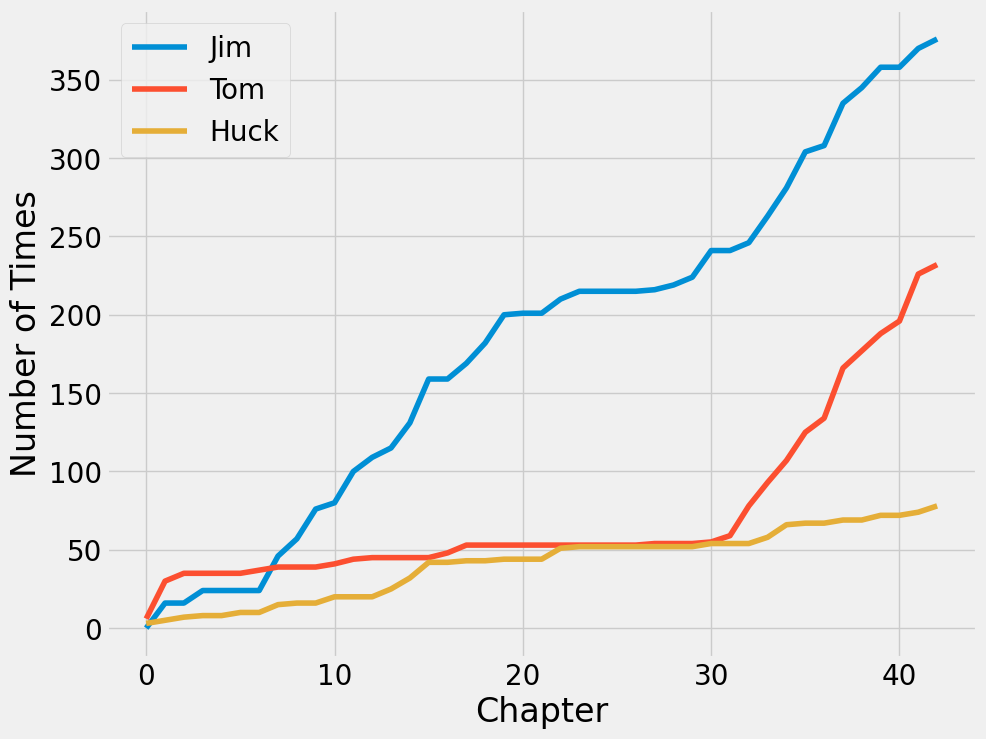

In [35]:
ax = counts.cumsum().plot(figsize=(10,8))
ax.set_xlabel("Chapter")
ax.set_ylabel("Number of Times")
#ax.set_ylim((-5,310))
plt.show()

There are lots of options for the figures ... Note that here we are using [Pandas Plot](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.plot.html) which is a wrapper around [MatPlot's Plot](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html).

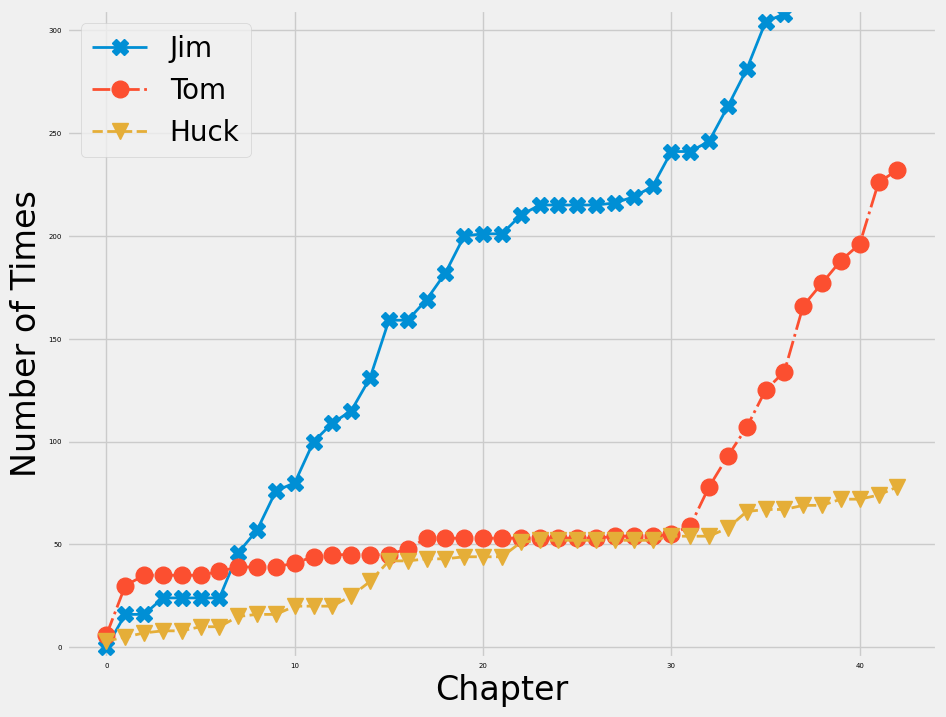

In [36]:
ax = counts.cumsum().plot(figsize=(10,8), fontsize=(5),
                                          lw=2,
                                          markersize=12,
                                          style=['X-','o-.','v--','s:','d:','*-.'])
ax.set_xlabel("Chapter")
ax.set_ylabel("Number of Times")
ax.set_ylim((-5,310))
plt.show()

In [37]:
# Now for Little women... here we're going to do the counts a little differently
# and use Numpy (NUmerical PYthon) functions

people = ['Amy', 'Beth', 'Jo', 'Laurie', 'Meg']
people_counts = {pp: np.char.count(little_women_chapters, pp) for pp in people}


In [38]:
people_counts.keys()

dict_keys(['Amy', 'Beth', 'Jo', 'Laurie', 'Meg'])

In [39]:
people_counts['Beth']

array([26, 12,  2, 18, 14, 28,  5,  9,  5,  5, 20, 20, 13,  5, 12,  9, 29,
       30,  7,  7,  1, 15,  6,  9,  6,  5,  4,  0,  1,  5,  3, 33,  6,  2,
        3, 37,  1,  0,  1, 21,  7,  9,  8,  0,  2,  1,  3])

In [40]:
# Make a pandas table...
counts = pd.DataFrame(people_counts)
counts

,Amy,Beth,Jo,Laurie,Meg
0,23,26,44,0,26
1,13,12,21,0,20
2,2,2,62,16,36
3,14,18,34,0,17
4,6,14,55,35,13
5,6,28,13,9,5
6,27,5,9,7,5
7,48,9,71,17,16
8,3,5,21,24,71
9,5,5,12,4,4


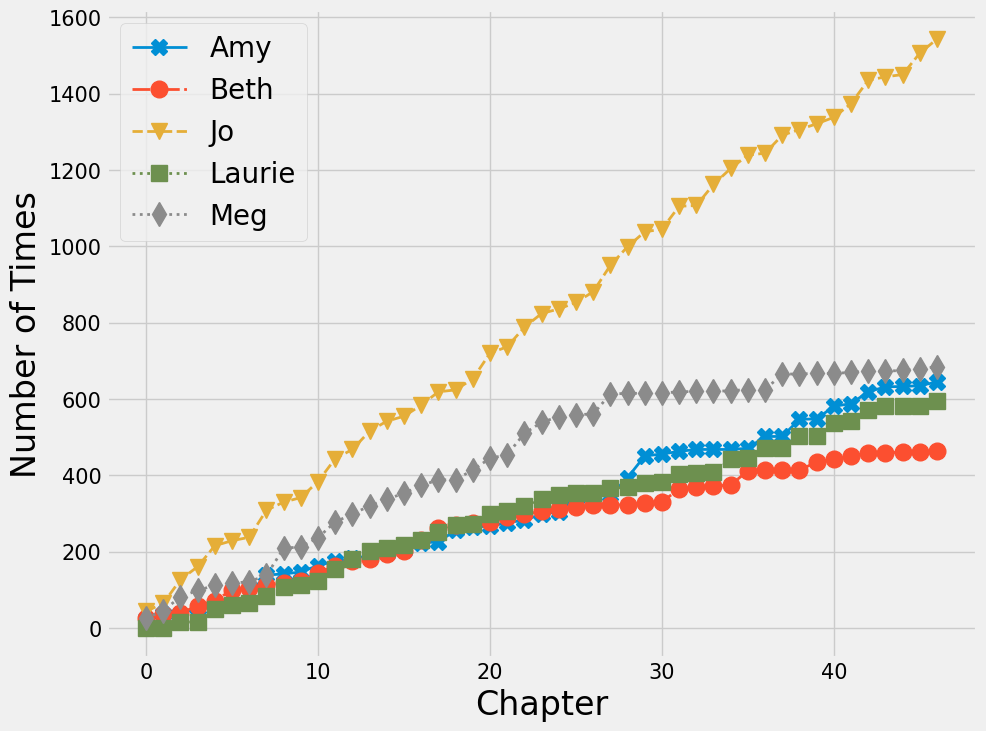

In [41]:
ax = counts.cumsum().plot(figsize=(10,8), fontsize=(15),
                                          lw=2,
                                          markersize=12,
                                          style=['X-','o-.','v--','s:','d:','*-.'])
ax.set_xlabel("Chapter")
ax.set_ylabel("Number of Times")
plt.show()

# Something more fun...

Inspired by the [Inferential Thinking Book](https://www.inferentialthinking.com/chapters/01/3/2/Another_Kind_Of_Character) let's do some more analysis on the text that we have loaded up.

First let's count the number of periods and the total number of characters in each of the books.

In [42]:
# Recall that each element in the array corresponds to a chapter.
print(huck_finn_chapters[0][:50])
print(little_women_chapters[0][:50])

I. YOU don't know about me without you have read a
ONE PLAYING PILGRIMS "Christmas won't be Christmas


In [43]:
chars_periods_huck_finn = pd.DataFrame({
        'Huck Finn Chapter Length':[len(s) for s in huck_finn_chapters],
        'Number of Periods':np.char.count(huck_finn_chapters, '.')
        })
chars_periods_little_women = pd.DataFrame({
        'Little Women Chapter Length': [len(s) for s in little_women_chapters],
        'Number of Periods': np.char.count(little_women_chapters, '.')
        })

In [44]:
display(chars_periods_huck_finn[:5])
display(chars_periods_little_women[:5])

,Huck Finn Chapter Length,Number of Periods
0,7026,66
1,11982,117
2,8529,72
3,6799,84
4,8166,91


,Little Women Chapter Length,Number of Periods
0,21759,189
1,22148,188
2,20558,231
3,25526,195
4,23395,255


What do we notice about the above?  It seems like *Little Women* is significantly longer per chapter than *Huck Finn*.  Let's try plotting this relationship on the same graph.

To do this we are going to use the `scatter` function from [MatPlotLib](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html)

Text(0, 0.5, 'Number of characters in chapter')

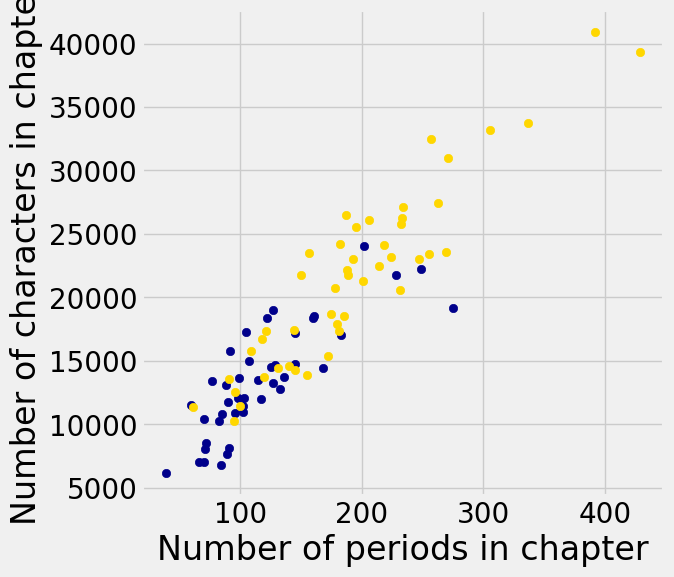

In [45]:
plt.figure(figsize=(6, 6))
plt.scatter(chars_periods_huck_finn["Number of Periods"],
              chars_periods_huck_finn["Huck Finn Chapter Length"],
              color='darkblue')

plt.scatter(chars_periods_little_women["Number of Periods"],
              chars_periods_little_women["Little Women Chapter Length"],
              color='gold')

plt.xlabel('Number of periods in chapter')
plt.ylabel('Number of characters in chapter')

The above plot shows us a few things:
1. Little Women is much longer on average than Huck
2. There seems to be a linear relationship between the number of characters and the number of periods

If we look at all the chapters that have 100 periods we see they have 10,000 - 15,000 characters.. or roughly 100-150 characters per sentence.  Seems like a Tweet.

In [46]:
# Let's formally find the relationship...
from scipy import stats

# First let's make the tables the same..
chars_periods_huck_finn.columns = ['characters', 'periods']
chars_periods_little_women.columns = ['characters', 'periods']
display(chars_periods_huck_finn[:5])
len(chars_periods_huck_finn)

,characters,periods
0,7026,66
1,11982,117
2,8529,72
3,6799,84
4,8166,91


43

In [47]:
# Now we are going to concatinate the data together -- this is our first join operation!

merged = pd.concat([chars_periods_huck_finn, chars_periods_little_women])
merged

,characters,periods
0,7026,66
1,11982,117
2,8529,72
3,6799,84
4,8166,91
...,...,...
42,33202,305
43,10289,95
44,12558,96
45,27094,234


In [48]:
len(merged)

90

In [49]:
slope, intercept, r_value, p_value, std_err = stats.linregress(merged['periods'],merged['characters'])

In [50]:
slope

89.0611539393866

In [51]:
intercept

3664.067173280624

In [52]:
r_value

0.9233365944610994

In [53]:
p_value

2.413147744447107e-38

In [54]:
std_err

3.9482862802859104

In [55]:
line = slope * merged['periods'] + intercept

Now we can add the line above to our plot using the [plot function](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html).

Text(0, 0.5, 'Number of characters in chapter')

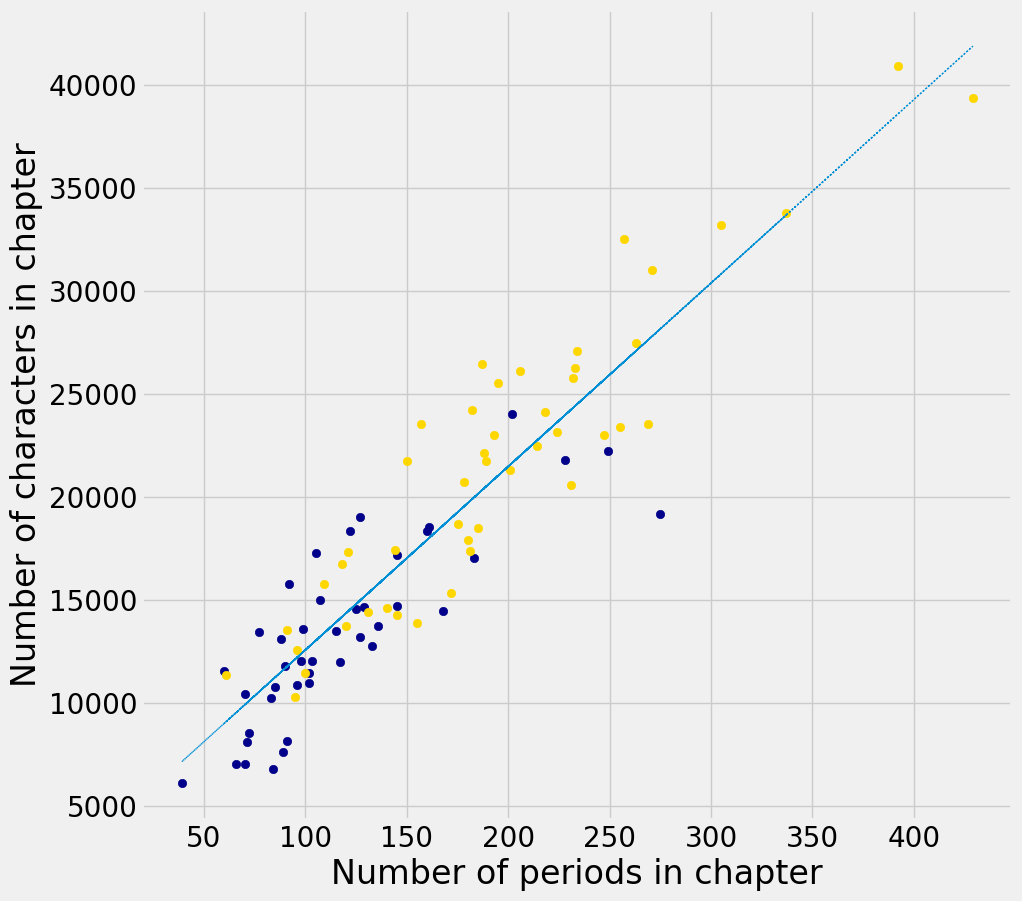

In [56]:
plt.figure(figsize=(10, 10))
plt.scatter(chars_periods_huck_finn["periods"],
              chars_periods_huck_finn["characters"],
              color='darkblue')

plt.scatter(chars_periods_little_women["periods"],
              chars_periods_little_women["characters"],
              color='gold')

plt.plot(merged['periods'], line, lw=1, ls=':')

plt.xlabel('Number of periods in chapter')
plt.ylabel('Number of characters in chapter')